<a href="https://colab.research.google.com/github/sripriyakonjarla/Machine_Learning/blob/main/lab_session_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import files
uploaded = files.upload()

Saving purchaseData2.xlsx to purchaseData2.xlsx


In [20]:
import pandas as pd
import io
import numpy as np

def segregate1(df1):
  a1 = df1["Candies (#)"]
  a2 = df1["Mangoes (Kg)"]
  a3 = df1["Milk Packets (#)"]
  A = np.column_stack((a1, a2, a3))
  return A

def segregrate2(df1):
  c1 = df1["Payment (Rs)"]
  C = c1.values
  return C

def pseudo_inverse(A, C):
  A_pi = np.linalg.pinv(A)
  B = A_pi.dot(C)
  return B

def find_rank(A):
  rank = np.linalg.matrix_rank(A)
  return rank

def find_behavior(C):
  behavior = []
  for pay in C:
    if pay>200:
      behavior.append("Rich")
    else:
      behavior.append("Poor")
  return behavior



#question A1
data1 = pd.read_excel(io.BytesIO(uploaded['purchaseData2.xlsx']))
df1= pd.DataFrame(data1)
#segregating the data into 2 matrices in the form AX=C.
A = segregate1(df1)
print(A)
C = segregrate2(df1)
print(C)
#using pseudo-inverse to find cost of each product.
B = pseudo_inverse(A, C)
print("Cost of candies= Rs.", round(B[0]))
print("Cost of mangoes= Rs.", round(B[1]))
print("Cost of milk packets= Rs.", round(B[2]))
#dimensionality of the vector space is given by the rank of the matrix.
rank= find_rank(A)
print("Dimensionality of the vector space= ", rank)
num = rank
#the number of vectors in the vector space is equal to the rank.
print ("No. of vectors= ", num)
#rank
print("Rank of the matrix A= ", rank)

#question A2
behavior = find_behavior(C)
df1["Behavior"] = behavior
print(df1)

[[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
[386 289 393 110 280 167 271 274 148 198]
Cost of candies= Rs. 1
Cost of mangoes= Rs. 55
Cost of milk packets= Rs. 18
Dimensionality of the vector space=  3
No. of vectors=  3
Rank of the matrix A=  3
  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs) Behavior
0      C_1           20             6                 2           386     Rich
1      C_2           16             3                 6           289     Rich
2      C_3           27             6                 2           393     Rich
3      C_4           19             1                 2           110     Poor
4      C_5           24             4                 2           280     Rich
5      C_6           22             1                 5           167     Poor
6      C_7           15             4                 2           271     Rich
7      C_8           18             4         

In [15]:
uploaded2 = files.upload()

Saving IRCTC Stock Price.xlsx to IRCTC Stock Price.xlsx


Mean=  1560.663
Variance=  58732.365
Mean of Wednesdays=  1550.706
The population mean is 977.655 times larger than the mean price of all Wednesdays
Mean of April=  1698.953
The population mean is 892.347 times larger than the mean price of the month April
Probability of loss over a stock: 0.498
Probability of making a profit on Wednesday: 0.201
Conditional probability of making a profit given that today is Wednesday: 0.42


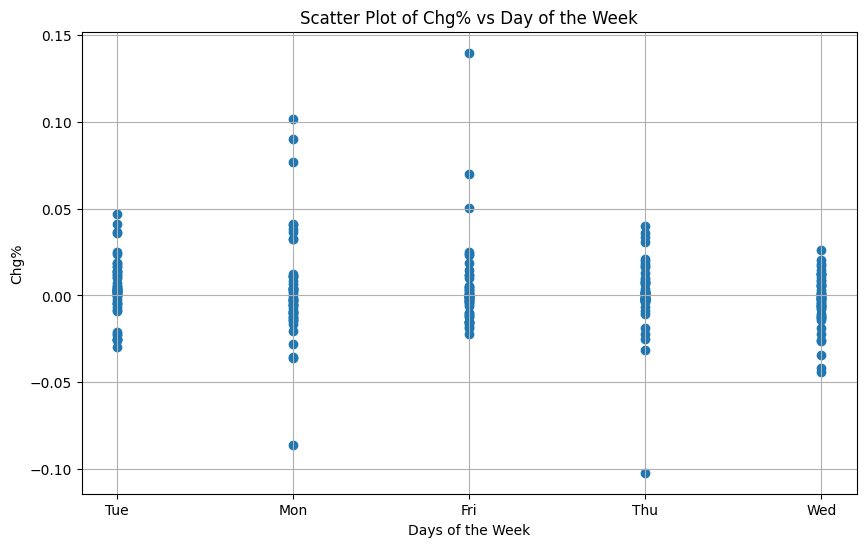

In [16]:
import statistics
import matplotlib.pyplot as plt
import pandas as pd

def calc_mean(df2):
  mean = statistics.mean(df2['Price'])
  return mean

def calc_var(df2):
  var = statistics.variance(df2['Price'])
  return var

def calc_meanValue(row_value, str):
  price = []
  for i in range(len(row_value)):
    if row_value.iloc[i] == str:
      price.append(df2["Price"].iloc[i])
  if price:
    return statistics.mean(price)
  else:
    return "None"

def calc_popMean(df2):
  volumes_in_thousands = []
  for volume in df2['Volume']:
    if volume[-1] == 'M':
      volumes_in_thousands.append(float(volume[:-1]) * 1000000 / 1000)
    elif volume[-1] == 'K':
      volumes_in_thousands.append(float(volume[:-1]) * 1000 / 1000)
  return statistics.mean(volumes_in_thousands)

def prob_loss(df2):
  neg_chg = df2["Chg%"].apply(lambda x: x < 0).sum()
  total_days = len(df2["Chg%"])
  return neg_chg / total_days

def prob_wed(df2):
  wed = 0
  for i in range(len(df2["Day"])):
    if df2["Day"].iloc[i] == "Wed":
      wed +=1
  return wed / len(df2["Day"])

def prob_prof(df2, row_value, str):
  prof = []
  for i in range(len(row_value)):
    if row_value.iloc[i] == str:
      prof.append(df2["Chg%"].iloc[i])
  if prof:
    prf_chg = sum(x > 0 for x in prof)
  return prf_chg / len(prof)

#question A3
data2 = pd.read_excel(io.BytesIO(uploaded2['IRCTC Stock Price.xlsx']))
df2= pd.DataFrame(data2)
#calculating the mean and variance of the values in column D.
mean = calc_mean(df2)
print("Mean= ", round(mean,3))
var = calc_var(df2)
print("Variance= ", round(var,3))
#calculating the mean for the price data of all Wednesdays.
day_value = df2["Day"]
mean_price_wed = calc_meanValue(day_value,"Wed")
print("Mean of Wednesdays= ", mean_price_wed)
#calculating the population mean.
pop_mean = calc_popMean(df2) * 1000
#comparing the population mean over the mean of the price of all Wednesdays.
print("The population mean is", round(pop_mean/mean_price_wed,3), "times larger than the mean price of all Wednesdays")
#calculating the mean for the price data of the month April.
month_value = df2["Month"]
mean_price_april = calc_meanValue(month_value,"Apr")
print("Mean of April= ", round(mean_price_april,3))
#comparing the population mean over the mean of the price in April.
print("The population mean is", round(pop_mean/mean_price_april,3), "times larger than the mean price of the month April")
#finding the probability of making a loss over the stock.
prob = prob_loss(df2)
print("Probability of loss over a stock:", round(prob,3))
#finding the probability of making a profit on Wednesday.
prob2 = prob_wed(df2)
print("Probability of making a profit on Wednesday:", round(prob2,3))
#finding the conditional probability of making profit, given that today is Wednesday.
prob3 = prob_prof(df2, day_value, "Wed")
print("Conditional probability of making a profit given that today is Wednesday:", prob3)
#scatter plot of Chg% data against the day of the week.
plt.figure(figsize=(10, 6))
plt.scatter(df2["Day"], df2["Chg%"])
plt.xlabel("Days of the Week")
plt.ylabel("Chg%")
plt.title("Scatter Plot of Chg% vs Day of the Week")
plt.grid(True)
plt.show()

In [35]:
uploaded3 = files.upload()

Saving thyroid0387_UCI.xlsx to thyroid0387_UCI.xlsx


Attributes and its datatypes:

The columns having Nominal datatype are sex,on thyroxine, on thyroxine, on antithyroid medication, sick, pregnent, thyroid surgery,I131 treatment, query hypothyroid, query hyperthyroid, lithium,goitre, tumor, hypopituitary, psych, TSH measured,query hypothyroid, query hyperthyroid, lithium,goitre, tumor, hypopituitary, psych, TSH measured,TT4 measured,TT4 measured,FTI measured,TBG measured
The columns having the ordinal datatype are referral source,CONDITION
The columns having discrete datatype are age,TSH,T3,TT4,T4U,FTI,TBG
-----------------------------------------------------------------------
The columns referral source,CONDITION are done using One-Hot encoding
The columns sex,on thyroxine, on thyroxine, on antithyroid medication, sick, pregnent, thyroid surgery,I131 treatment, query hypothyroid, query hyperthyroid, lithium,goitre, tumor, hypopituitary, psych, TSH measured,query hypothyroid, query hyperthyroid, lithium,goitre, tumor, hypopituitary, psy

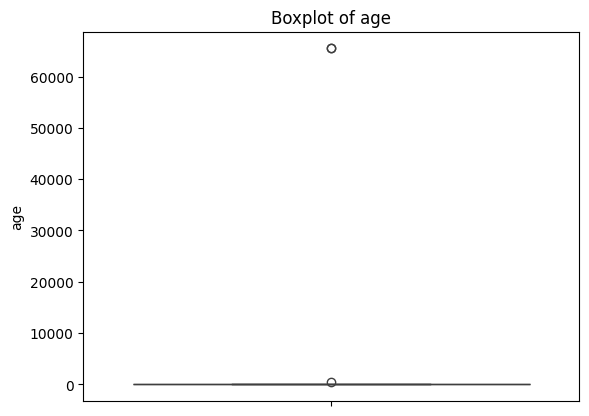

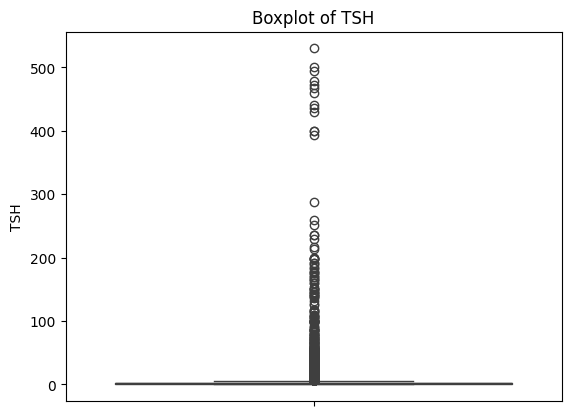

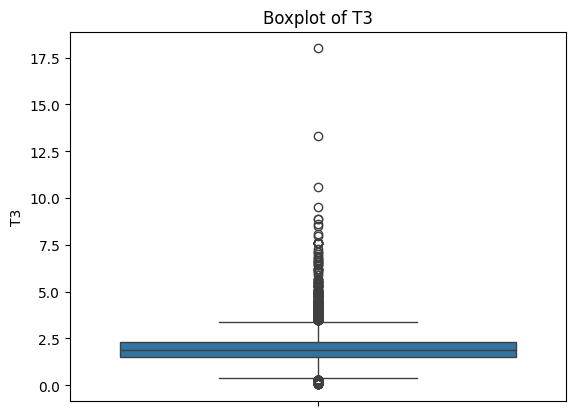

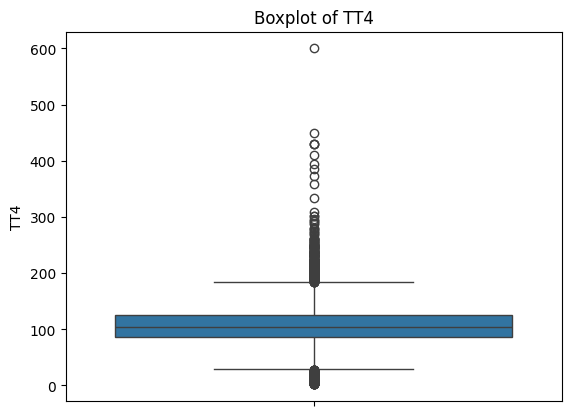

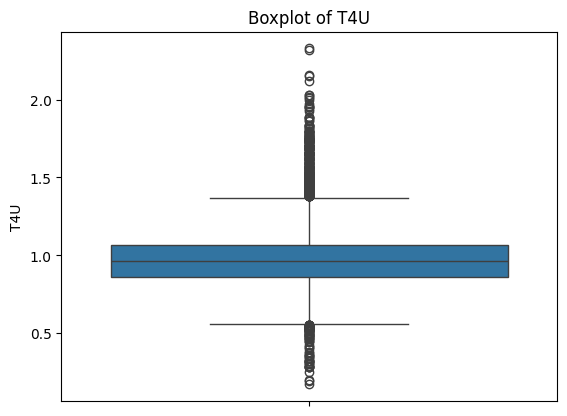

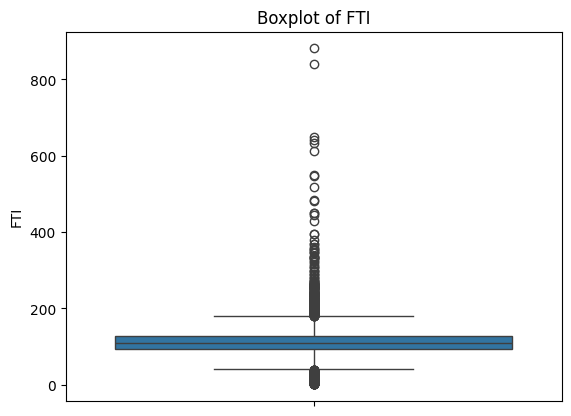

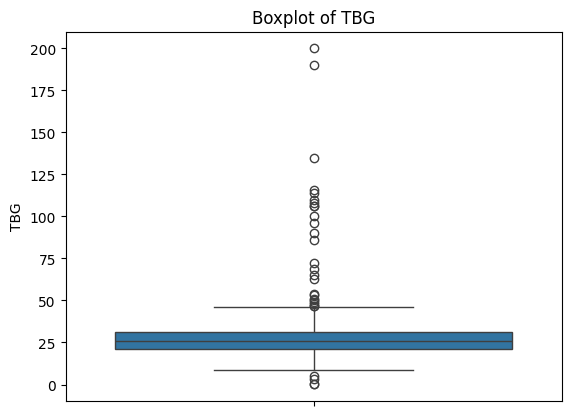

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
data3 = pd.read_excel(io.BytesIO(uploaded3['thyroid0387_UCI.xlsx']))
df3= pd.DataFrame(data3)
#question A6
def identity_dtype(df3):
  column_dtypes = []
  for column in df3.columns:
    column_dtypes.append((column, df3[column].dtype, df3[column].unique()))
  return column_dtypes

def convert_num(dataframe, column_name):
  dataframe[column_name].replace("?", np.nan, inplace=True)
  num_column = pd.to_numeric(dataframe[column_name], errors="coerce")
  return num_column

def find_range(df3, column_name):
  numeric_column = convert_num(df3, column_name)
  min_value = numeric_column.min()
  max_value = numeric_column.max()
  return min_value, max_value

def find_missing(df3, column_name):
  num = 0
  for value in df3[column_name]:
    if value == "?":
      num += 1
  return num

def find_lower_quart(df3, column_name):
  numeric_column = convert_num(df3, column_name)
  low_q = numeric_column.quantile(0.25)
  return low_q

def find_upper_quart(df3, column_name):
  numeric_column = convert_num(df3, column_name)
  high_q = numeric_column.quantile(0.75)
  return high_q

def find_statistics(df3, column_name):
  numeric_column = convert_num(df3, column_name)
  mean = numeric_column.mean()
  variance = numeric_column.var()
  std_dev = numeric_column.std()
  return mean, variance, std_dev

data3 = pd.read_excel(io.BytesIO(uploaded3['thyroid0387_UCI.xlsx']))
df3 = pd.DataFrame(data3)
numeric_df = pd.DataFrame()
for column in df3.columns:
  for value in df3[column]:
    if isinstance(value, str) and (value.isnumeric() or value == "?"):
      numeric_df[column] = df3[column]
      break
numeric_df = numeric_df.drop("sex", axis=1)
numeric_df["age"] = df3["age"]
#studying the attributes and associated values, and identifying the datatypes
print("Attributes and its datatypes:")
print()
print("The columns having Nominal datatype are sex,on thyroxine, on thyroxine, on antithyroid medication, sick, pregnent, thyroid surgery,I131 treatment, query hypothyroid, query hyperthyroid, lithium,goitre, tumor, hypopituitary, psych, TSH measured,query hypothyroid, query hyperthyroid, lithium,goitre, tumor, hypopituitary, psych, TSH measured,TT4 measured,TT4 measured,FTI measured,TBG measured")
print("The columns having the ordinal datatype are referral source,CONDITION")
print("The columns having discrete datatype are age,TSH,T3,TT4,T4U,FTI,TBG")
print("-----------------------------------------------------------------------")
#identifying the encoding scheme to be employed
print("The columns referral source,CONDITION are done using One-Hot encoding")
print("The columns sex,on thyroxine, on thyroxine, on antithyroid medication, sick, pregnent, thyroid surgery,I131 treatment, query hypothyroid, query hyperthyroid, lithium,goitre, tumor, hypopituitary, psych, TSH measured,query hypothyroid, query hyperthyroid, lithium,goitre, tumor, hypopituitary, psych, TSH measured,TT4 measured,TT4 measured,FTI measured,TBG measured are done using  label encoding")
print("-----------------------------------------------------------------------")
#studying the data range for numeric variables.
print("Data range for numeric variables:")
print()
for column in numeric_df.columns:
  min_value, max_value = find_range(numeric_df, column)
  print(column, "range:", min_value, "-", max_value)
print("-----------------------------------------------------------------------")
#studying the presence of missing values in each attribute.
print("Missing values in each column:")
print()
for column in df3.columns:
  num_missing = find_missing(df3, column)
  print("Number of missing values in column", column, "is ", num_missing)
print("-----------------------------------------------------------------------")
#calculating the mean and variance and standard deviation.
for column in numeric_df.columns:
  mean, variance, std_dev = find_statistics(df3, column)
  print("Mean of column", column, "is", round(mean,3))
  print("Variance of column", column, "is", round(variance,3))
  print("Standard deviation of column", column, "is", round(std_dev,3))

df3_filtered = df3[['age','TSH','T3','TT4','T4U','FTI','TBG']]
for column in df3_filtered.select_dtypes(include=['float64', 'int64']):
    plt.figure()
    sns.boxplot(y=df3_filtered[column])
    plt.title(f"Boxplot of {column}")
    plt.show()
